In [1]:
# !pip install spacy

In [2]:
#!python -m spacy download en_core_web_sm

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import string
from wordcloud import WordCloud,STOPWORDS

In [4]:
df=pd.read_json("Magazine_Subscriptions.json", lines=True)

In [5]:
reviews=df["reviewText"]

In [6]:
reviews[37]

"It's a great guide of home improvement projects.  I like the detailed information and the variety of projects offered.  One thing I don't like is all the advertisements.  My last issue had 5 out of the first pages as advertisements - it's my only gripe."

### Removing Punctuations

In [7]:

df_text=[x for x in df["reviewText"] if x]

In [8]:
df_text

['for computer enthusiast, MaxPC is a welcome sight in your mailbox. i can remember for years savorying every page of "boot" (as it was called in beginning) as i was (and still am) obcessed with PC\'s. Anyone, from advanced users - to beginners looking for knowledge - can profit from every issue of MaxPC. the icing on the cake is the subscription that comes with a CD-ROM as it is packed with demos, utilities, and other useful apps (very helpful for those not blessed with broadband connections). Until I discovered the community of hardware enthusiast web sites, MaxPC, formerly "boot", was my only really informative source for computing news and articles. To this day, i consider my subscription to it worth more than 10 subscriptions to most other computing mags. I can\'t wait until they merge with DVD media and maybe end up offering more info on Divx codecs, encoding your own movies, and best bang for the buck audio and video equipment. Try a few issues (with CD)and you may get hooked...

In [9]:
no_punctuation_text=[]


In [10]:
for text in df_text:
    text_=str(text)
    x=text_.translate(str.maketrans('', '', string.punctuation))
    no_punctuation_text.append(x)

In [11]:
no_punctuation_text

['for computer enthusiast MaxPC is a welcome sight in your mailbox i can remember for years savorying every page of boot as it was called in beginning as i was and still am obcessed with PCs Anyone from advanced users  to beginners looking for knowledge  can profit from every issue of MaxPC the icing on the cake is the subscription that comes with a CDROM as it is packed with demos utilities and other useful apps very helpful for those not blessed with broadband connections Until I discovered the community of hardware enthusiast web sites MaxPC formerly boot was my only really informative source for computing news and articles To this day i consider my subscription to it worth more than 10 subscriptions to most other computing mags I cant wait until they merge with DVD media and maybe end up offering more info on Divx codecs encoding your own movies and best bang for the buck audio and video equipment Try a few issues with CDand you may get hooked',
 'Thank god this is not a Ziff Davis

## Sentiment Analysis

In [12]:
negative = open("negative-words.txt","r")
negative_word=negative.read()
negative.close()

In [13]:
negative_word=negative_word.strip()
neg_list=negative_word.split(sep='\n')

In [14]:
positive =open("positive-words.txt","r")
positive_word=positive.read()
positive.close()

In [15]:
positive_word=positive_word.strip()
pos_list=positive_word.split(sep='\n')

In [16]:
sentiment_list=[]
for sentence in no_punctuation_text:
    word_list=sentence.split(" ")
    sentiment=0
    for word in word_list:
        if word in pos_list:
            sentiment+=1
        if word in neg_list:
            sentiment-=1
    if sentiment>0:
        sentiment_list.append("Positive")
    elif sentiment<0:
        sentiment_list.append("Negative")
    else:
        sentiment_list.append("Nutral")


In [17]:
sentiments_df=pd.DataFrame({"Comments":no_punctuation_text,"Sentiment":sentiment_list})

In [18]:
sentiments_df.head(10)

,Comments,Sentiment
0,for computer enthusiast MaxPC is a welcome sig...,Positive
1,Thank god this is not a Ziff Davis publication...,Nutral
2,Antiques Magazine is a publication made for an...,Positive
3,This beautiful magazine is in itself a work of...,Positive
4,A great read every issue,Nutral
5,This magazine was great for the times but as w...,Positive
6,Ive read Maximum PC MPC for many years The art...,Positive
7,We ordered this magazine for our grandson then...,Nutral
8,I have subscribed to the nook version for a fe...,Positive
9,Im old and so is my computer Any advice that ...,Positive


<AxesSubplot:>

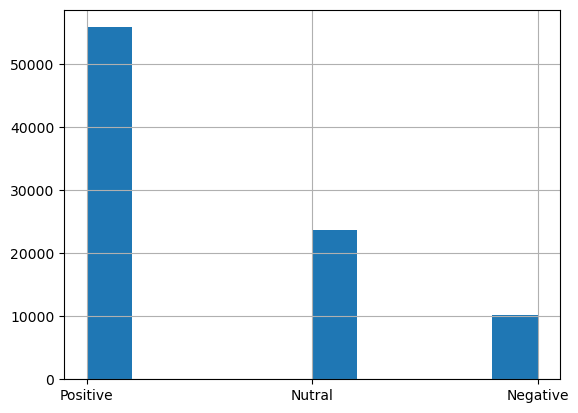

In [19]:
sentiments_df["Sentiment"].hist()